In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load files
ride_data = "data/ride_data.csv"
city_data = "data/city_data.csv"

# Read the City and Ride Data
ride_df = pd.read_csv(ride_data)
city_df = pd.read_csv(city_data)

# Combine the data into a single dataset
main_df = pd.merge(ride_df, city_df, on="city", how="left")

# Display the data table for preview
main_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


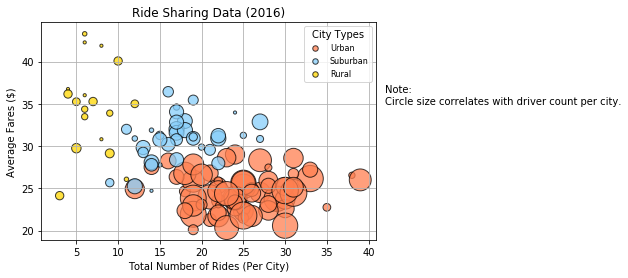

In [3]:
# Make data frames by city
urban_cities = main_df[main_df["type"] == "Urban"].groupby([main_df["city"]])
suburban_cities = main_df[main_df["type"] == "Suburban"].groupby([main_df["city"]])
rural_cities = main_df[main_df["type"] == "Rural"].groupby([main_df["city"]])

# Calculate ride count (x is for x axis), fare average (y is for y axis), 
# and driver count average(s is for size) for each city group
urban_x = urban_cities["ride_id"].count()
urban_y = urban_cities["fare"].mean()
urban_s = urban_cities["driver_count"].mean()
suburban_x = suburban_cities["ride_id"].count()
suburban_y = suburban_cities["fare"].mean()
suburban_s = suburban_cities["driver_count"].mean()
rural_x = rural_cities["ride_id"].count()
rural_y = rural_cities["fare"].mean()
rural_s = rural_cities["driver_count"].mean()

# Make scatter plots for each city group
plt.scatter(urban_x, urban_y, s=urban_s*10, label="Urban", marker="o", color=["coral"],
            edgecolor="black", alpha=0.75)
plt.scatter(suburban_x, suburban_y, s=suburban_s*10, label="Suburban", marker="o", color=["lightskyblue"],
            edgecolor="black", alpha=0.75)
plt.scatter(rural_x, rural_y, s=rural_s*10, label="Rural", marker="o", color=["gold"],
            edgecolor="black", alpha=0.75)

# Make grid, labels, legend (with markers in handles set to equal size), and note on circle size in plot
plt.grid()
plt.title("Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")
legend = plt.legend(title= "City Types", fontsize = 8, loc=0, scatterpoints=1)
for handle in legend.legendHandles:
    handle.set_sizes([30])
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("Images/ride_share_scatter.png", bbox_inches="tight")

# Show plot
plt.show()

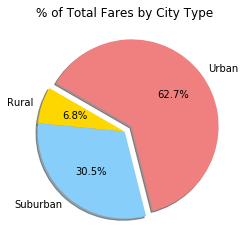

In [4]:
# Calculate Type Percents
type_group = main_df.groupby(["type"])
total_fares = type_group["fare"].sum()

# Make Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0,0,0.1)
colors = ["gold","lightskyblue","lightcoral"]
plt.pie(total_fares, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/total_fares_pie.png")

# Show plot
plt.show()

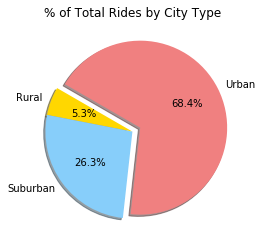

In [5]:
# Calculate Ride Percents
total_rides = type_group["ride_id"].count()

# Make Pie Chart
plt.pie(total_rides, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/total_rides_pie.png")

# Show plot
plt.show()

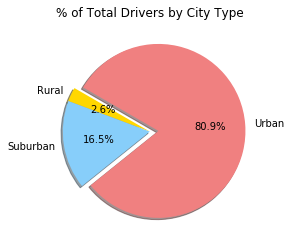

In [14]:
# Calculate Driver Percents
city_type_group = city_df.groupby(["type"])
total_drivers = city_type_group["driver_count"].sum()

# Make Pie Chart
plt.pie(total_drivers,  labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/total_drivers_pie.png")

# Show plot
plt.show()